## 1. Импорт данных и описательный анализ

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\user\Desktop\report_2018-2019.csv')
data

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


В этом наборе данных описывается индекс счастья в 2018 и 2019 годах и набор независимых переменных, таких как «Общий рейтинг», «ВВП на душу населения», «Социальная поддержка», «Продолжительность здоровой жизни», «Свобода». делать жизненный выбор», «Щедрость» и «Восприятие коррупции». Я буду анализировать картину в целом, не учитывая страну и год, по этому удалю не нужные мне столбцы:

In [3]:
data.drop(["Overall rank","Country or region","Year"], axis=1,inplace=True)

In [4]:
data[['GDP per capita', 'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].describe() 

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,0.898298,1.211026,0.661295,0.423538,0.182926,0.111526
std,0.394592,0.300310,0.252724,0.156024,0.096739,0.095296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000
50%,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000
75%,1.219500,1.457500,0.858000,0.540250,0.245000,0.141250
max,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000


## 2. Гипотезы.

H0 - Коэффициенты регрессии равны нулю, ни один из предикторов не влияет на зависимую переменную.   
H1 - По крайней мере один из коэффициентов регрессии не равен нулю и есть хотя бы один предиктор, который влияет на зависимую переменную.

## 3. Регрессионный анализ

#### Проверю данные на нормальность распределения остатков:

In [22]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import probplot

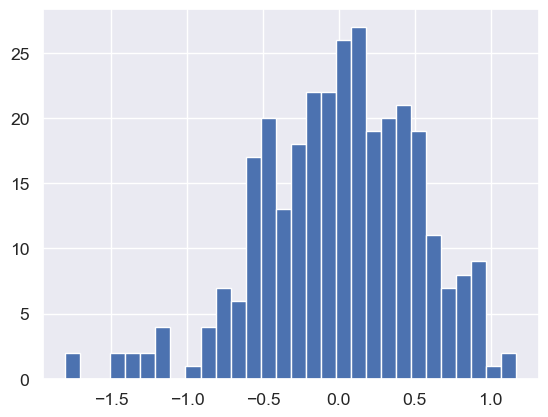

In [19]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred
plt.hist(residuals, bins=30)
plt.show()

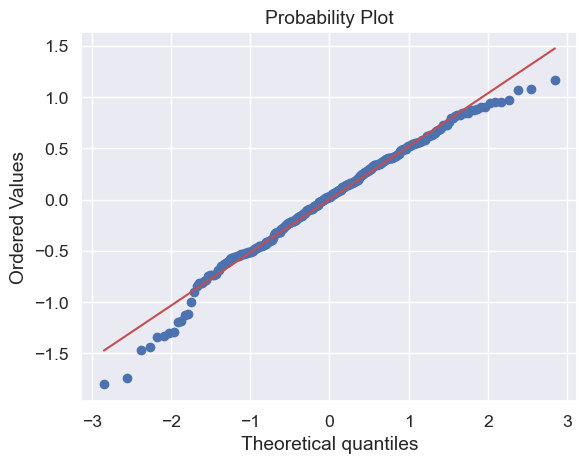

In [20]:
probplot(residuals, plot=plt)
plt.show()

В целом по графикам видно, что остатки распредлены нормальным образом и данные гетероскедастичны, есть незначитительные выбросы, но данные подходят для дальнейшей работы.

#### Провека данных на мультиколлинеарность  и на линейную зависимость переменных:

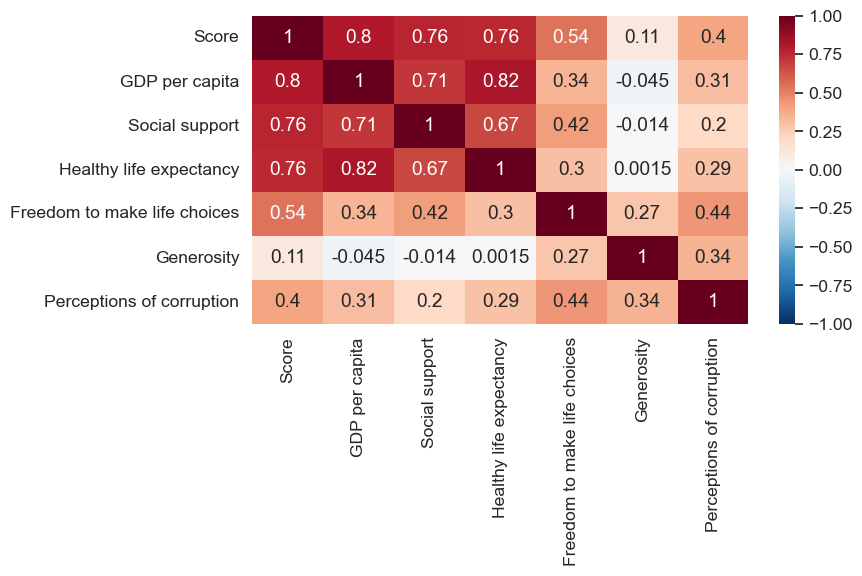

In [12]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

Из таблицы видно, что коэффициент корреляции между некотрыми переменными достаточно высок,например между GDP per capita и Social support, что может указывать на наличие мультиколлинеарности, однако другие коэффициенты корреляции не так высоки, поэтому данные в целом подходят по параметру мультиколлинеарности. Так же переменные имеют линейную зависимость, для построения модели попробую исключить перменные с сильной зависимостью, для определения эффективной модели.

In [24]:
y = data['Score']
X = data[['GDP per capita', 'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
model = ols('y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 25 May 2023   Prob (F-statistic):           3.21e-98
Time:                        17:48:22   Log-Likelihood:                -237.33
No. Observations:                 312   AIC:                             488.7
Df Residuals:                     305   BIC:                             514.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8563      0.141     13.207      0.0

Я построила регрессионную модель с коэффициентом детерминации 0,779, что говорит о том, что 77,9% дисперсии зависимой переменной, объясняется рассматриваемой моделью. Также была проведена проверка на исключение переменных с сильными линейными зависимостями, но удаление какой-либо переменной снижает эффективность модели, поэтому данная модель является наиболее эффективной.


Интерпретация модели:  
    - По результатам t-теста я вижу, что 5 переменных из 6 являются статистически значимыми и имеют p-value ниже 0,05 и оказывают влияние на нашу зависимую переменную, поэтому мы можем отклонить нулевую гипотезу.   
    - F-statistic и его p-value говорят о том, что  модель позволяет  объяснить поведение нашей зависимой переменной.   
    - Наша зависимая переменная – счастье, может быть описана такой регрессионной моделью – Y = 1,8563 + 0,9395 * GDP per capita + 1,0582 * Social support + 0,9393 * Healthy life expectancy  + 1,4093 * Freedom to make life choices + 0,5315 * Generosity  + 0,8473 * Perceptions of corruption, такая модель позволяет максимально эффективно взаимосвязь этих переменных и объяснить изменчивость нашей зависимой переменной.  
    - С каждым единичным увеличением ВВП на душу населения показатель счастья будет увеличиваться на 0.9395, также с каждым увелечением остальных статистически значимых переменных на еденицу, показатель счастья будет увеличиваться на коээфициент регрессии этой независимой переменной.  

*Датасет взят с https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019*